In [6]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns


In [7]:
species_df = pd.read_csv('data/species_info.csv')
species_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [8]:
observations_df = pd.read_csv('data/observations.csv')
observations_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


                             park_name  observations
0                  Bryce National Park        576025
1  Great Smoky Mountains National Park        431820
2            Yellowstone National Park       1443562
3               Yosemite National Park        863332


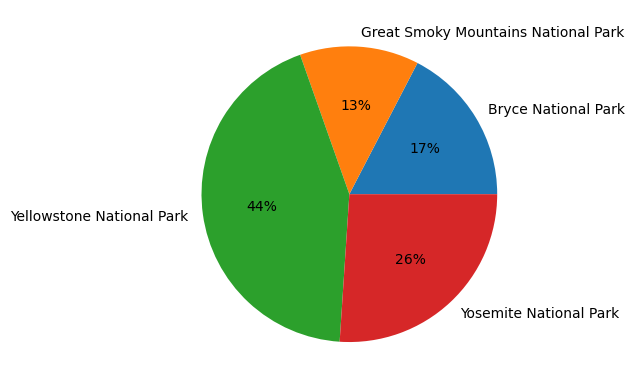

In [138]:
#EDA

#find out many parks this data set covers and how many obersation per park

unique_parks = observations_df.groupby("park_name")["observations"].sum().reset_index()

#unique_parks['percentage'] = unique_parks["observations"] / unique_parks["observations"].sum()*100

print(unique_parks)

plt.pie(unique_parks["observations"],labels = unique_parks["park_name"],autopct='%.0f%%')
plt.show()


In [81]:
uPark_df = observations_df.apply(lambda x: )


431820